In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
from google.colab import files
import pandas as pd
import io

try:
    data = pd.read_csv('FitbitsAndGradesData_Fall2017.csv')
    print("File loaded successfully from default path.")
except FileNotFoundError:
    print("FitbitsAndGradesData_Fall2017.csv not found. Please upload the file.")
    uploaded = files.upload()
    if 'FitbitsAndGradesData_Fall2017.csv' in uploaded:
        data = pd.read_csv(io.BytesIO(uploaded['FitbitsAndGradesData_Fall2017.csv']))
        print("File uploaded and loaded successfully.")
    else:
        print("File was not uploaded or had a different name. Please ensure you upload 'FitbitsAndGradesData_Fall2017.csv'.")
        data = None # Set data to None if upload fails

if data is not None:
    print(data.head())

File loaded successfully from default path.
   Key  Steps  Peak  Cardio  FatBurn  Mode  Minutes  Gender  Age   GPA  \
0    1  11157  0.13    3.86   111.92     1     9.35       1   23  4.00   
1    2   7986  2.72   15.53   249.29     1     8.20       1   18  3.26   
2    3  11602  0.35    2.10   195.32     0    12.73       0   18  3.07   
3    4  10609  1.00    6.51   121.75     1    10.00       1   17  4.00   
4    5  14552  9.10    6.09   109.66     1     8.63       0   18  2.87   

   Life Score  
0          48  
1         101  
2          64  
3          41  
4          83  


In [ ]:
!ls -F

FitbitsAndGradesData_Fall2017.csv  sample_data/


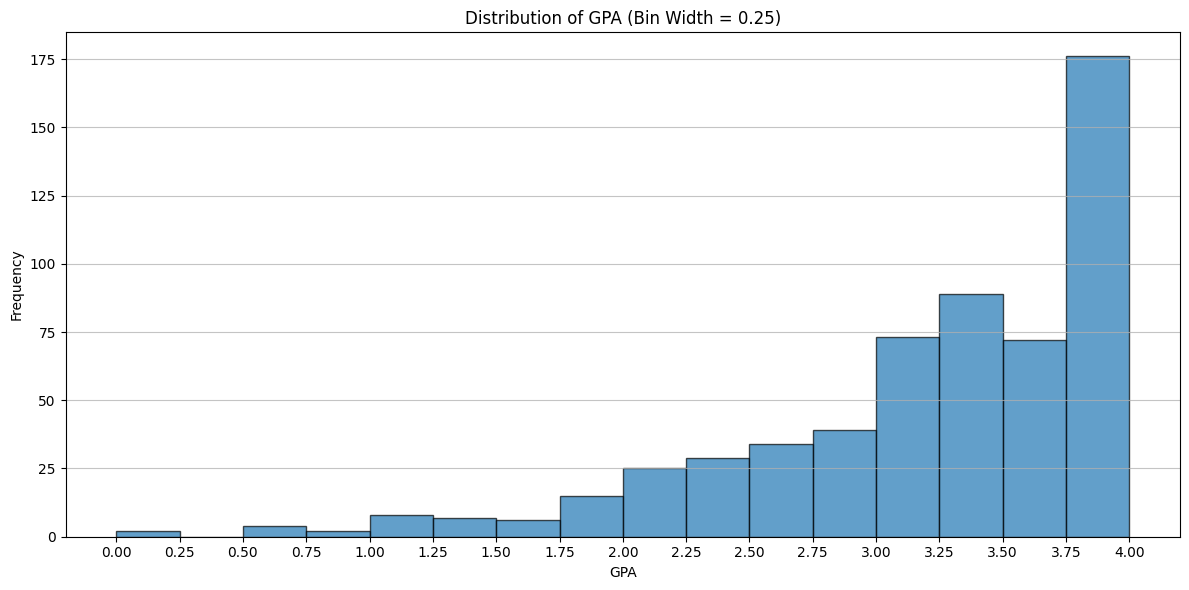

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

gpa_data = data['GPA'].dropna()

min_gpa = gpa_data.min()
max_gpa = gpa_data.max()
bin_width = 0.25

bins = np.arange(np.floor(min_gpa / bin_width) * bin_width, max_gpa + bin_width, bin_width)

plt.figure(figsize=(12, 6))
plt.hist(gpa_data, bins=bins, edgecolor='black', alpha=0.7)
plt.title('Distribution of GPA (Bin Width = 0.25)')
plt.xlabel('GPA')
plt.ylabel('Frequency')

plt.xticks(np.round(bins, 2))
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

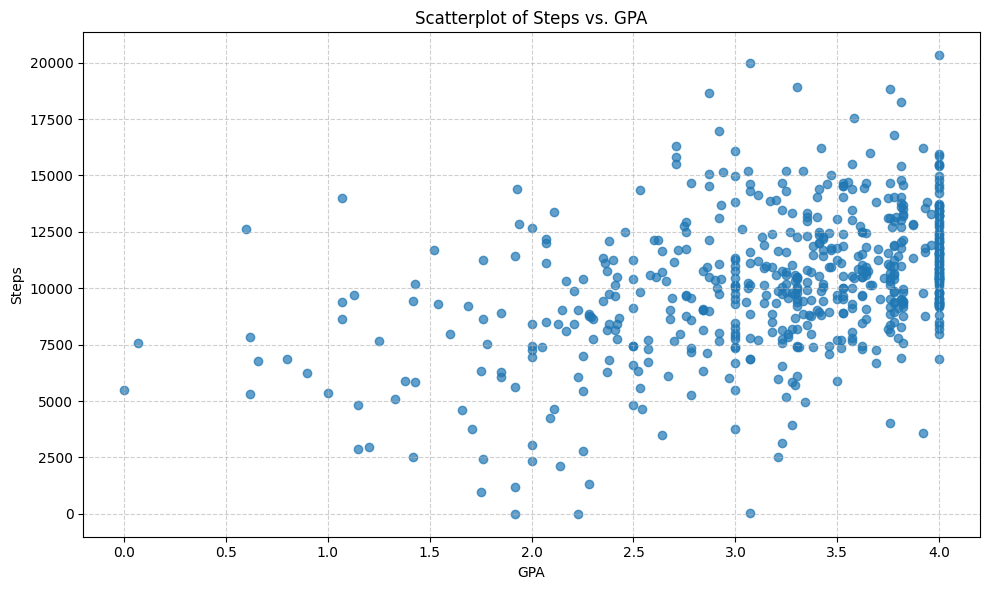

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plot_data = data[['GPA', 'Steps']].dropna()

plt.figure(figsize=(10, 6))
plt.scatter(plot_data['GPA'], plot_data['Steps'], alpha=0.7)
plt.title('Scatterplot of Steps vs. GPA')
plt.xlabel('GPA')
plt.ylabel('Steps')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
model = smf.ols('GPA ~ Steps', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     117.7
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           4.33e-25
Time:                        02:17:42   Log-Likelihood:                -608.97
No. Observations:                 581   AIC:                             1222.
Df Residuals:                     579   BIC:                             1231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1482      0.100     21.494      0.0

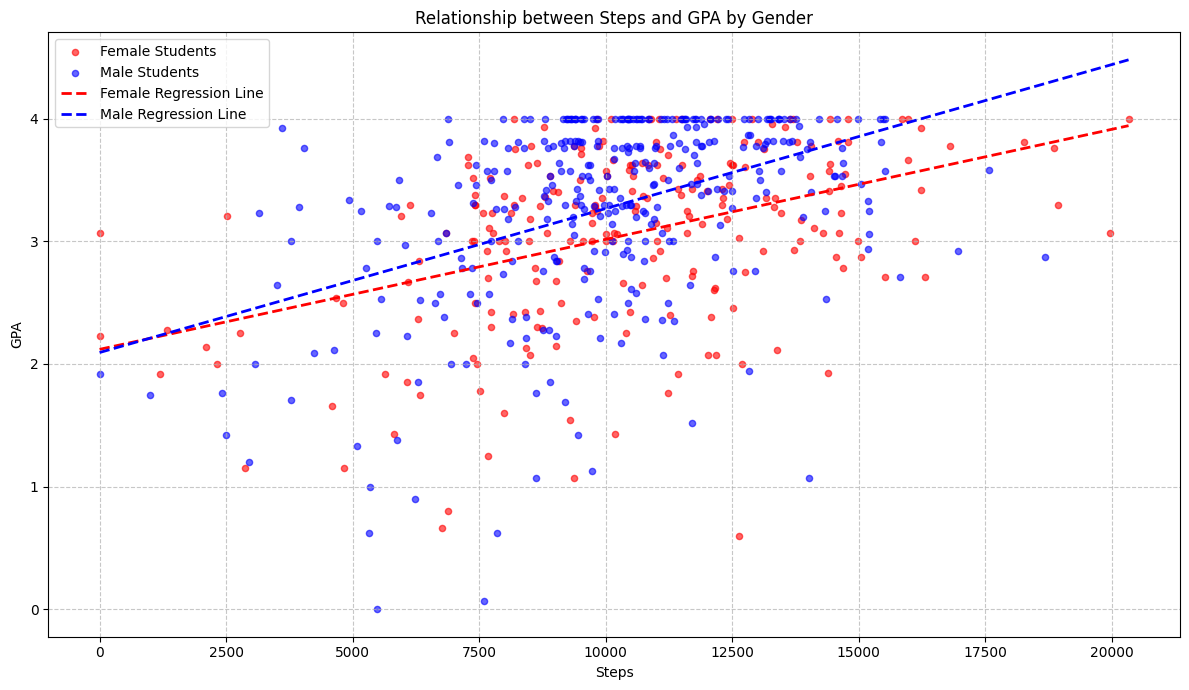

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     48.12
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           9.15e-28
Time:                        02:17:45   Log-Likelihood:                -597.87
No. Observations:                 581   AIC:                             1204.
Df Residuals:                     577   BIC:                             1221.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.1192      0.14

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

data['Gender_Male'] = data['Gender']

plot_data_model = data[['GPA', 'Steps', 'Gender_Male']].dropna()

model = smf.ols('GPA ~ Gender_Male + Steps + Gender_Male:Steps', data=plot_data_model).fit()

min_steps = plot_data_model['Steps'].min()
max_steps = plot_data_model['Steps'].max()

steps_range = np.linspace(min_steps, max_steps, 100)

pred_df_female = pd.DataFrame({'Steps': steps_range, 'Gender_Male': 0})
pred_df_female['Predicted_GPA'] = model.predict(pred_df_female)

pred_df_male = pd.DataFrame({'Steps': steps_range, 'Gender_Male': 1})
pred_df_male['Predicted_GPA'] = model.predict(pred_df_male)

plt.figure(figsize=(12, 7))

plt.scatter(plot_data_model[plot_data_model['Gender_Male'] == 0]['Steps'],
            plot_data_model[plot_data_model['Gender_Male'] == 0]['GPA'],
            alpha=0.6, label='Female Students', color='red', s=20)

plt.scatter(plot_data_model[plot_data_model['Gender_Male'] == 1]['Steps'],
            plot_data_model[plot_data_model['Gender_Male'] == 1]['GPA'],
            alpha=0.6, label='Male Students', color='blue', s=20)

plt.plot(pred_df_female['Steps'], pred_df_female['Predicted_GPA'],
         color='red', linestyle='--', linewidth=2, label='Female Regression Line')

plt.plot(pred_df_male['Steps'], pred_df_male['Predicted_GPA'],
         color='blue', linestyle='--', linewidth=2, label='Male Regression Line')

plt.title('Relationship between Steps and GPA by Gender')
plt.xlabel('Steps')
plt.ylabel('GPA')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(model.summary())

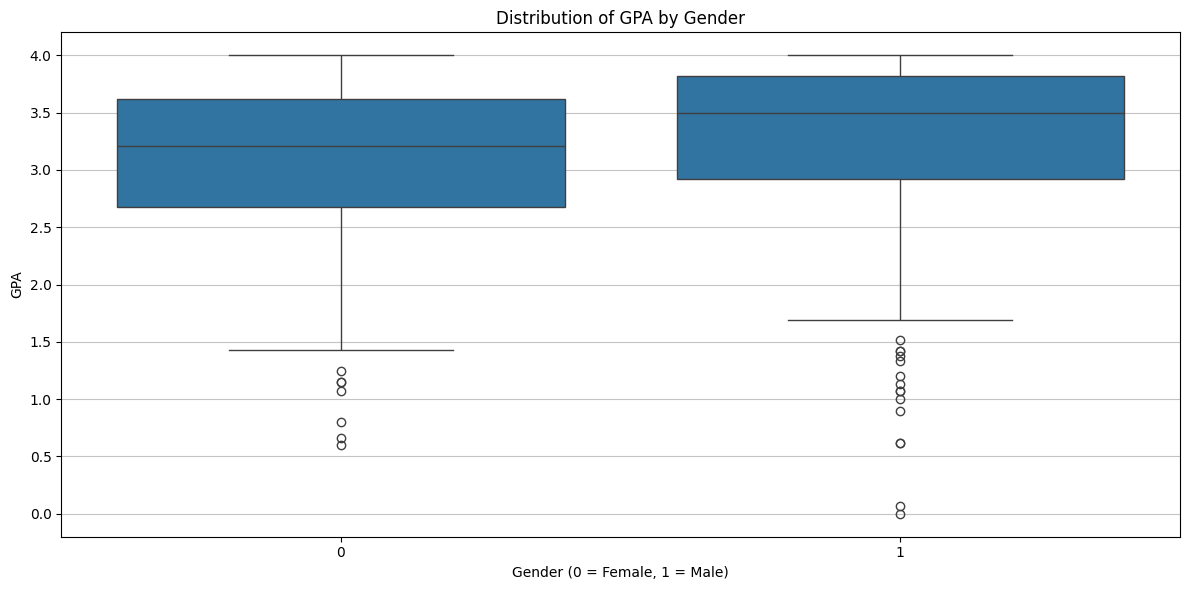

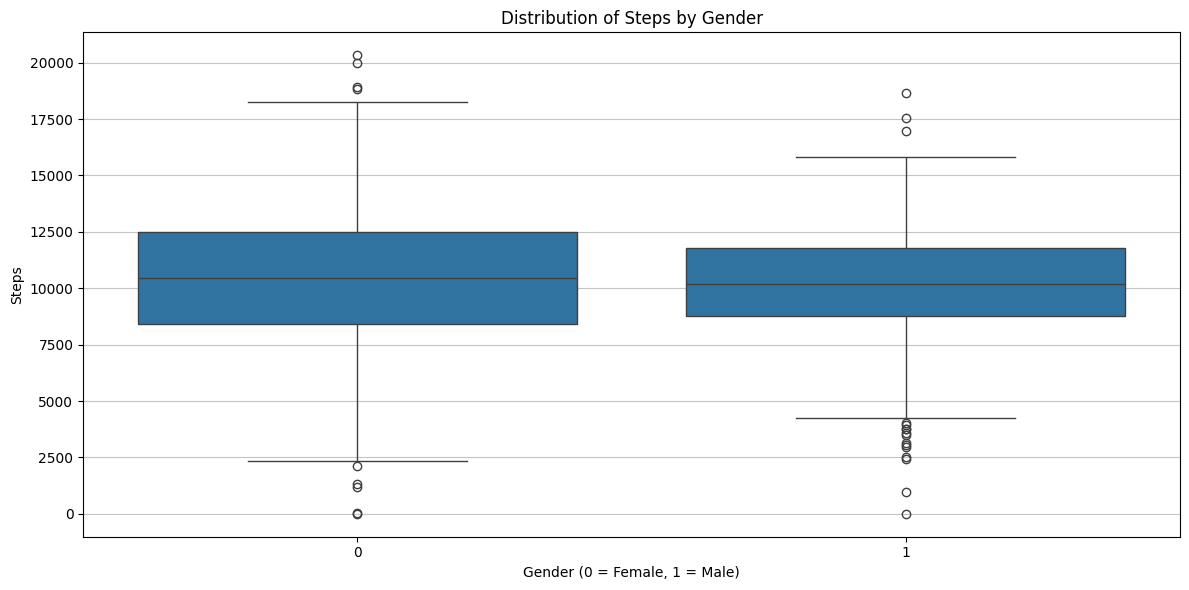

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='GPA', data=data)
plt.title('Distribution of GPA by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('GPA')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Steps', data=data)
plt.title('Distribution of Steps by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Steps')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

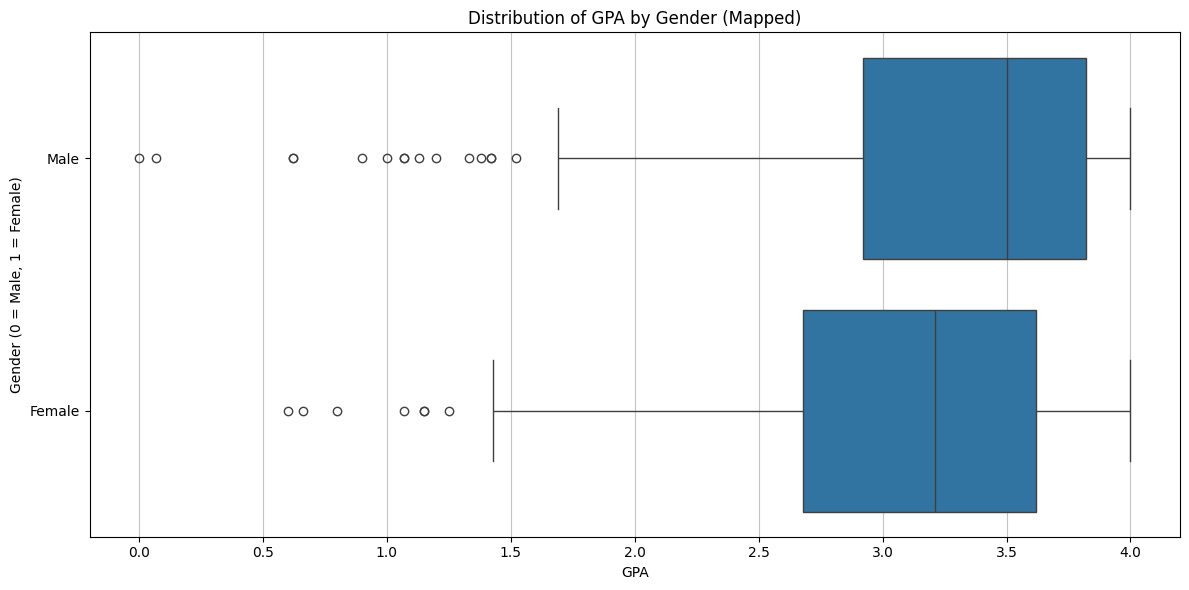

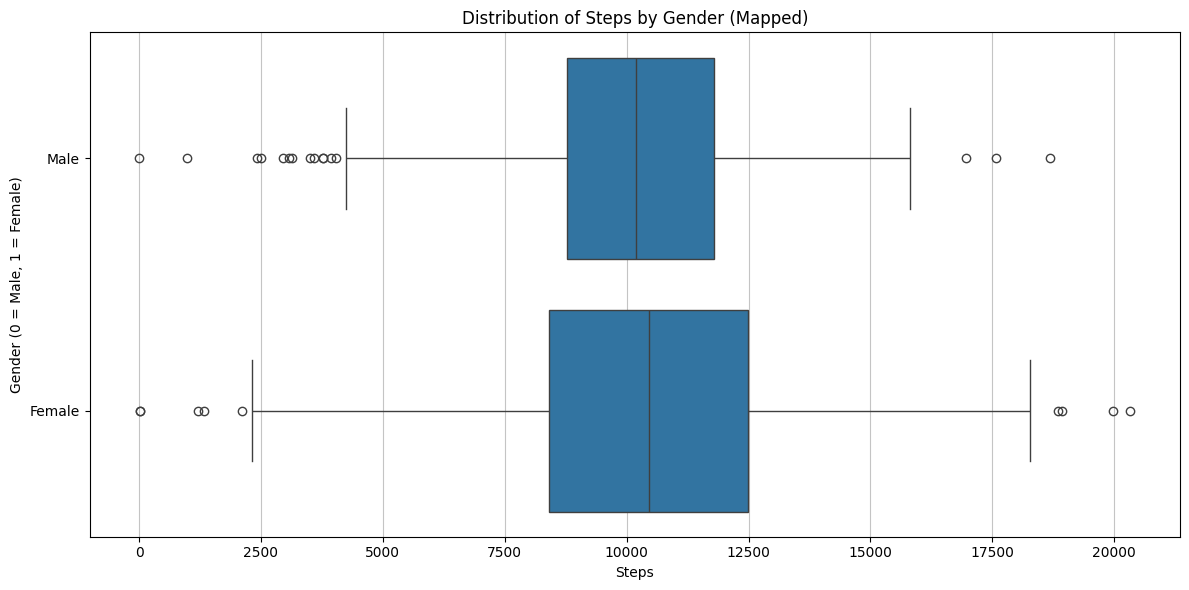

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Gender_for_plotting'] = data['Gender'].map({1: 0, 0: 1})

plt.figure(figsize=(12, 6))
sns.boxplot(x='GPA', y='Gender_for_plotting', data=data, orient='h')
plt.title('Distribution of GPA by Gender (Mapped)')
plt.xlabel('GPA')
plt.ylabel('Gender (0 = Male, 1 = Female)')
plt.yticks([0, 1], ['Male', 'Female'])
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Steps', y='Gender_for_plotting', data=data, orient='h')
plt.title('Distribution of Steps by Gender (Mapped)')
plt.xlabel('Steps')
plt.ylabel('Gender (0 = Male, 1 = Female)')
plt.yticks([0, 1], ['Male', 'Female'])
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()